# STA 4163 Project 1 (Variance, ANOVAs, and Nonparametric Tests)

### Name:
Xavier Andres Soto Baron

### UCF ID:
5601517


- This project will involve using software to analyze a real-world dataset.
- Each student will work alone. Collaboration is allowed, but each student should turn in
their own work and code/output.
- For each question, make sure to include your written response and relevant code/output.
- Just showing a screenshot of your output alone is not sufficient.
- For each hypothesis test, make sure to:
- State the null and alternate hypothesis.
- State the test statistic.
- State the p-value or rejection region.
- State the conclusion in context of the data.
- Include any relevant code and output.
- You do not need to state/check assumptions of any test unless specifically asked.
- Use **α = 0.05** for all tests
----

## The Project Setup
- Penicillin is a drug that is commonly used to treat bacterial infections. It is created from a
blue mold, and being able to extract as much penicillin as possible is important to manufacturing.
Another important raw material is corn steep liquor, which also known to influence yield
(Sajjad-Ur-Rahman).

- A manufacturer is trying 4 new processes to maximize yield, labelled as A, B, C, and D.
They also want to see how they potentially interact with the concentration of corn steep liquor
(Box).


- In webcourses, there is a file called `penicillin.xlsx` that will be used for the following
questions. It has 3 variables: yield (%), treatment (labelled as A, B, C, or D), and corn steep
liquor concentration (high or low). Use this dataset to answer the following questions.

---


## Uploading the Data to R

- Excel File penicilin.xlsx is stored in the same folder as the Jupyter Notebook, we upload the dataset to a dataframe using read excel.
- import reading excel libraries using `readxl` to store in dataframe as the following:
  
  ``in r df<- read_excel("penicilin.xlsx")``
- `df <- data.frame(penicilin)` does not save the dataframe in this notebook
  

In [46]:
#Install library and run it
install.packages("readxl")#Only once

# Load the library
library(readxl)

#Uploade the excel file and convert it to a data frame 
df <- read_excel("penicillin.xlsx")
df <- data.frame(df) #Save to datagrame
print(df) #Print the Peniclin data

Warning message:
"package 'readxl' is in use and will not be installed"


   yield treatment corn
1     80         A High
2     89         B High
3     98         C High
4     89         D High
5     88         A High
6     82         B High
7     92         C High
8     85         D High
9     79         A  Low
10    72         B  Low
11    94         C  Low
12    72         D  Low
13    76         A  Low
14    82         B  Low
15    89         C  Low
16    80         D  Low


---
## [20 pts] Question 1:
- Conduct a test of equal variance for the yield for the low concentration and
high concentration of corn steep liquor.



**Answer:** We are going to run a test of equal variances or an F Test:
### F-Test

**Step 0:** We assume the assumptions are met as the question doesnt ask to test them.

**Step 1:** State Null and Alternative Hypotheses:

 $$H_0: \sigma^2_{\text{Low}} = \sigma^2_{\text{High}}$$
 $$H_1: \sigma^2_{\text{Low}} \neq \sigma^2_{\text{High}}$$

This means we are running a two-tailed test

**Step 2:** State level of Significance $\alpha$

- $\alpha$ = 0.05 $\to$ As Stated in project rules.

**Step 3:** Compute Test Statistic using R code

- We run Test of Equal Variances (F-Test) using:
`var.test(Yield ~ Corn)`

**Step 4:** We could use the table to determine critical values. In this case, we will use R p-value for the test.



In [47]:

#Test of Equal Variance for the Yield for the low concentration and high concentration of Corn Steep Liquor
var.test(Yield ~ Corn)



	F test to compare two variances

data:  Yield by Corn
F = 0.53508, num df = 7, denom df = 7, p-value = 0.4283
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1071256 2.6726887
sample estimates:
ratio of variances 
         0.5350825 


## R - Output Results:
**Test Statistic:** F = 0.5351  
**Numerator df:** 7  **Denominator df:** 7  
**p-value:** 0.4283  

**95% Confidence Interval for σ²₁ / σ²₂:** (0.1071, 2.6727)

---

#### Decision

P-Value: 0.4283. 

Significance Level: $\alpha$ = 0.05.

P-value = 0.4283 > $\alpha$ = 0.05 $\to$ **Fail to Reject $H_0$**

---

**Step 5:**  State the Conclusion 

We Fail to reject $H_0$. At Significance level **0.05**, we cannot conclude that the variances(standard deviation) of Penicilin yield between the **Low and High corn concentrations differs significantly**. They appear roughly equal.

---



## [10 pts] Question 2: 

- The researchers first look at each treatment without looking at corn steep liquor concentration. They plan on using an ANOVA for a single factor to analyze treatment on
its own. Check the assumptions of this test using the methods taught in the course. Does it appear
that the ANOVA would be valid? If yes, explain why. If no, explain why not, and propose an
alternative nonparametric test.

---
### Run a One way Anova Test
- Question asks to check assumptions for this test.

**Step 0:** Check Assumptions for One Way Anova Test

**1).** There Must be **K simple random samples**

- We assume the data was **Randomly** collected for the penicilin dataset.

**2).** The **K samples must be independent** of each other

- We assume the data for this experiment is **independent**

**3).** The population **Must be Normally Distributed**

- We draw a boxplot with R code and look for symmetric boxplots with no strong outliers and skews.

**4).** The population **Must have roughly the same variance**

- Using R, we get the Standard deviation(SD) of each of the treatments.
  
If:
$$
\frac{SD_{\text{biggest}}}{SD_{\text{smallest}}} < 2
$$

Then assumption is met.
  

[1] 5.123475

[1] 6.994045

[1] 3.774917

[1] 7.325754

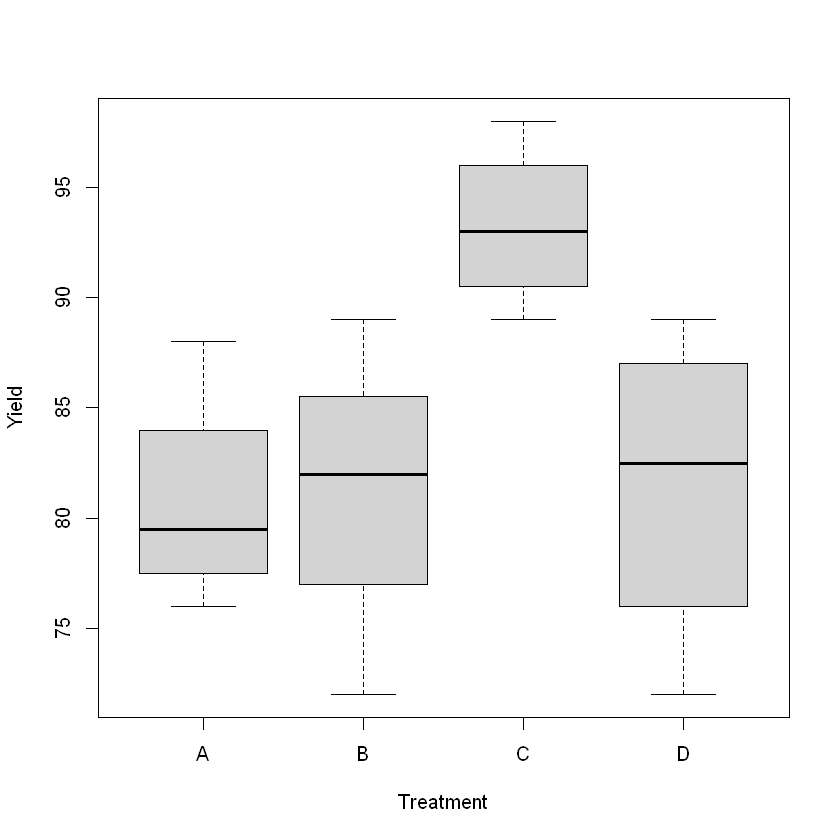

In [53]:
#Check Assumptions
#Normal Distribution & Same Variance

#Boxplots
boxplot(Yield ~ Treatment)

#Standard Deviations
sd(df[Treatment == "A", "yield"])
sd(df[Treatment == "B", "yield"])
sd(df[Treatment == "C", "yield"])
sd(df[Treatment == "D", "yield"])

## Analyze R-Output for Assumptions

**Normal Distribution Assumption**
  
- The Data for A, B, C, and D appears to be **Normally Distributed**.
- The Boxplots look **roughly symmetric** with centered medians.
- The Boxplots **do not** have any strong Outliers or Skews.

This means that the **Assumption for a population normally distributed is met**.

**Equal Variance Assumption**

- **Standard deviation for A:** 5.1234753829798
- **Standard deviation for B:** 6.9940450861191
- **Standard deviation for C:** 3.77491721763537
- **Standard deviation for D:** 7.32575365861197

Biggest Standard deviation is **D**

Smallest Standard deviation is **C**

$$
\frac{A}{C} < 2 \;\to\; \frac{7.32575365861197}{3.77491721763537} = 1.94143842279857 < 2
$$

After performing the division, it is roughly **1.94**. This is less than 2. 

This means that the **assumption for equal variances is met**.

---
## Conclusion for One Way Anova Test Assumptions

- After checking the requirements for the Anova test, all the assumptions are met. 
- We can run a One Way Anova Test.

---





## [15 pts] Question 3a: 

- Regardless of your answer in question 2, run the one-factor ANOVA to
analyze treatment on its own. There is no need to run a post-hoc test.
---

## Run the one-factor Anova Test
After assumptions are met in step 0, we proceed to run the One Way Anova Test.

**Step 1:** State Null And Alternative Hypothesis.
$$
H_0: \mu_A = \mu_B = \mu_C = \mu_D
$$
$$
H_1:\ \text{At least one mean yield differs among treatments}
$$

**Step 2:** State the Level of Significance **$\alpha$**

- **$\alpha$** = 0.05 $\to$ as default stated in project rules

**Step 3:** Complete Anova Table, or use R output for Anova Table.

In [54]:
#Run One Way Anova Test
oneway_results <- aov(Yield ~ Treatment, data = df)
summary(oneway_results)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    3  439.2  146.40   4.093 0.0324 *
Residuals   12  429.2   35.77                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---
**Step 4:** Use either a rejection Region or the P-value to make a decision. In this Scenario, we will be using P-Value from ANOVA Table

---

## ANOVA TABLE

| Source | df | Sum Sq | Mean Sq | F | p-value |
|:--|:--|:--|:--|:--|:--|
| Treatment | 3 | 439.2 | 146.40 | 4.093 | 0.0324 |
| Residuals | 12 | 429.2 | 35.77 |  |  |

**Decision:**

- P-value: 0.0324
- P-value < $\alpha$
- P-value = 0.0324 < $\alpha$ = 0.05. $\to$ we **reject the Null Hypothesis** $H_0$


**Step 5:** State the Conclusion

- We reject the Null the Hypothesis $H_0$. At the significance level 0.05, there is **sufficient evidence** to conclude that the mean penicilin yield differs among at least one of the four treatments (A,B,C,D).



---
## [15 pts] Question 3b: 
- Regardless of your answer in question 2, run the appropriate
nonparametric test to analyze treatment on its own
---
## Run Nonparametric test Kruskal-Wallis Test
- Anova Assumptions are met, however we still run the Kruskal Wallis test as asked.

**Step 0:** We assume the Assumptions are met thanks to the question.

**Step 1:** State Null and Alternate Hypothesis
- $H_0:$ The distributions of the populations are the same
- $H_1:$ The distribution of the populations are different

**Step 2:** State the level of Significance $\alpha$
- $\alpha:$ 0.05 $\to$ as default stated in the project rules.

**Step 3:** Calculate the test statistic


In [55]:
#Run Kruskal-Wallis Test
kruskal.test(Yield ~ Treatment, data = df)


	Kruskal-Wallis rank sum test

data:  Yield by Treatment
Kruskal-Wallis chi-squared = 8.1074, df = 3, p-value = 0.04384


## Kruskal-Wallis Test Results

- **Chi-squared=**  8.1074
- **Degrees of Freedom (df) =** 4-1 = 3.
- **P-value =** 0.04384 

### Decision
- P-value = 0.04384
- Significance Level $\alpha=$0.05
- P-value = 0.04384 < $\alpha=$0.05 $\to$ We **reject the Null Hypothesis** $H_0$.
  

**State the Conclusion:**

- We reject the Null Hypothesis $H_0$. At the significance level $\alpha$= 0.05, there is sufficient evidence to conclude that the yield distributions  differ among at least one of the four Treatments A,B,C and D.

---

## [10 pts] Question 3c: 
- Based on your results from question 2, which results should you report to
the manufacturer?
---

### Which Results Should Be Reported 

Based on the results from **Question 2**: 
- The boxplots for each treatment were **roughly symmetric** and showed **no strong outliers**.  
- The largest-to-smallest SD ratio was below 2, indicating **approximately equal variances**.
  
Therefore, the **assumptions required for a one-way ANOVA appear valid**.

Because the ANOVA assumptions were satisfied, the **parametric one-way ANOVA (Question 3a)** results should be reported to the manufacturer. 

**Kruskal-Wallis Test** is only used, if ANOVA Assumptions are **not met**.

The ANOVA indicated a significant difference among the treatment means.  
- $F=4.093$, *p = 0.0324*), p-value < $\alpha$ $\to$ reject $H_0$.

Therefore, there is **sufficient evidence** to conclude that the mean penicilin yield differs among at least one of the four treatments (A,B,C,D).

---





## [30 pts] Question 4:
- Now, the researchers are interested in both factors (treatment and corn steep
liquor), as well as their interaction. Conduct the appropriate ANOVA F-tests and the appropriate
multiple comparisons test (if needed). After running all the appropriate tests, what
recommendations would you make to the manufacturer for the highest penicillin yield?
---

## We perform a Two-Factor ANOVA (Treatment × Corn)  

**Requirements:** Assumptions For Two-Factor ANOVA were previously met from Question 2 above.

**TEST 1:** Hypothesis Regarding Interaction Effect

- $H_0:$ There is no interaction between Factors
- $H_1:$ There is interaction between Factors

At $\alpha$ = 0.05 Significance level.

After stating the Hypothesis, we test and see if Null is **rejected or not**.

- If we **Reject Null** $H_0$ $\to$ skip Tests 2 and 3 and we perform a Tukey Test.
- If we **Fail to Reject Null** $H_0$, we perform Tests 2 and 3.

We then run a Two-Factor Anova test in R.


In [56]:
#Two-Factor ANOVA Test
twoway_results <- aov(Yield ~ Treatment + Corn + Treatment:Corn, data = df)
summary(twoway_results)

               Df Sum Sq Mean Sq F value Pr(>F)  
Treatment       3  439.2  146.40   6.453 0.0157 *
Corn            1  217.6  217.56   9.590 0.0147 *
Treatment:Corn  3   30.2   10.06   0.444 0.7284  
Residuals       8  181.5   22.69                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Two-Factor ANOVA Table from R:

| Source | df | Sum Sq | Mean Sq | F | p-value 
|:--|:--|:--|:--|:--|:--|
| Treatment | 3 | 439.2 | 146.40 | 6.453 | 0.0157 
| Corn | 1 | 217.6 | 217.56 | 9.590 | 0.0147 | 
| Treatment×Corn | 3 | 30.2 | 10.06 | 0.444 | 0.7284  
| Residuals | 8 | 181.5 | 22.69 |  |  |  |

---
### Interpretation

At Significance Level **$\alpha=$**  **0.05:**

- **Interaction:** Not significant (p = 0.7284) → the effect of Treatment on yield is consistent across corn levels.

The interaction **p-value is 0.7284**, which is **bigger** than $\alpha$=0.05. This means that we will **Fail to Reject Null Hypothesis**.

After Rejecting Null Hypothesis $H_0$, we perform **Tests 2 and 3**.

---
### Test 2 - Factor Treatment:

**Hypothesis:**

- **$H_0$**: $\mu_A$ = $\mu_B$ = $\mu_C$ = $\mu_D$ 
- **$H_1$**: At least 1 of the means differs

We obtained a **P-value:** 0.0157 at $\alpha$= 0.05. $\to$ p-value<$\alpha$ $\to$ We reject Null Hypothesis $H_0$.

- We reject Null Hypothesis $H_0$. We conclude that at least **1 mean of treatment differs**

We perform a **Tukey Test** to find out which of the treatment **differs**.





In [57]:
#Test 2:

# Run Tukey’s HSD for the Treatment factor
TukeyHSD(twoway_results, which = "Treatment")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Yield ~ Treatment + Corn + Treatment:Corn, data = df)

$Treatment
      diff        lwr        upr     p adj
B-A   0.50 -10.285677 11.2856765 0.9987330
C-A  12.50   1.714323 23.2856765 0.0246323
D-A   0.75 -10.035677 11.5356765 0.9957837
C-B  12.00   1.214323 22.7856765 0.0302204
D-B   0.25 -10.535677 11.0356765 0.9998403
D-C -11.75 -22.535677 -0.9643235 0.0334967


| Comparison | Mean Diff | 95% CI Lower | 95% CI Upper | p adj | Significant? |
|:--|--:|--:|--:|--:|:--|
| B – A | 0.50 | –10.29 | 11.29 | 0.9987 | No |
| C – A | 12.50 | 1.71 | 23.29 | 0.0246 | **Yes** |
| D – A | 0.75 | –10.04 | 11.54 | 0.9958 | No |
| C – B | 12.00 | 1.21 | 22.79 | 0.0302 | **Yes** |
| D – B | 0.25 | –10.54 | 11.04 | 0.9998 | No |
| D – C | –11.75 | –22.54 | –0.96 | 0.0335 | **Yes** |

---

**Interpretation:**
- Significant differences occur for **C vs A**, **C vs B**, and **C vs D** (p < 0.05).
- There's no significant differences for **B vs A**, **D vs A**, and **D vs B** (p > 0.05).
- Treatment C produced a **significantly higher mean yield** than A and B.  
- Treatment D produced a **significantly lower mean yield** than C.

---

### Conclusion for Test 2:

- At the 0.05 level, there is a significant main effect of **Treatment**.  
- Specifically, **Treatment C yields significantly higher penicillin than A, B and D**
- There is **no significant difference** in mean yield among treatments A, B, and D.

$$
(\overline{\mu_A\;\mu_B\;\mu_D} \;\;\;\; \overline{\mu_c})
$$$$
\mu_C > \mu_A = \mu_B = \mu_D
$$


---
## Test 3 — Corn Main Effect (Low vs High)

Based on the Two-Factor ANOVA Table we perform the following Test.

### State the Hypothesis

$$
H_0:\ \mu_{\text{Low}} = \mu_{\text{High}} 
$$

$$
H_1:\ \mu_{\text{Low}} \neq \mu_{\text{High}}
$$

### State the Level of Significance

$\alpha$ = 0.05 $\to$ default as project rules. 

---

### Test Results

We obtained a **P-value:** 0.0147 at $\alpha$= 0.05. $\to$ p-value<$\alpha$ $\to$ We reject Null Hypothesis $H_0$.

- We reject Null Hypothesis $H_0$. We conclude that the mean yield differs between Low and High.

We use **R** to find the mean for Corn High and Low, and perform a **Tukey Test**.


In [58]:
#Test 3

# Mean yield for each corn concentration
mean(df[Corn == "Low",  "yield"])
mean(df[Corn == "High", "yield"])

#Tukey Test
TukeyHSD(twoway_results, which = "Corn")

[1] 80.5

[1] 87.875

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Yield ~ Treatment + Corn + Treatment:Corn, data = df)

$Corn
           diff       lwr      upr     p adj
Low-High -7.375 -12.86691 -1.88309 0.0147393


---
### Group Means

| Corn Level | Mean Yield (%) |
|:--|--:|
| Low | 80.50 |
| High | 87.875 |

---

### Decision
Since $p = 0.0147 < 0.05$, **reject $H_0$**.

### Conclusion
At the 0.05 significance level, there is a **significant main effect of corn concentration** on penicillin yield.  
Mean yield under **High corn** (87.875 %) is significantly greater than under **Low corn** (80.5 %).  

### Recommendation
**The manufacturer should use the High corn steep-liquor concentration to maximize penicillin production.**